# <font color = 'purple'> Supervised learning - classification based problem 

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("./datasets/spam.csv", encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3406,ham,Beautiful Truth against Gravity.. Read careful...,NaN,NaN,NaN
4703,ham,Yar but they say got some error.,NaN,NaN,NaN
599,ham,I'm going out to buy mum's present ar.,NaN,NaN,NaN
2450,ham,K..give back my thanks.,NaN,NaN,NaN
1013,ham,Just buy a pizza. Meat lovers or supreme. U ge...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# <font color = 'red'> Steps followed
***
###  1. Data cleaning.
### 2. EDA. 
### 3.Text Preprocessing. 
### 4. Model building.
### 5. Evaluation. 
### 6. Improvement. 
### 7. Website. 
### 8. Deploy. 

# <font color = "Orange"> 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop last 3 columns as they have more null values 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True )

df.sample(5)

,v1,v2
4778,ham,O we cant see if we can join denis and mina? O...
4409,ham,You also didnt get na hi hi hi hi hi
1048,ham,I walked an hour 2 c u! doesnåÕt that show I c...
1495,ham,Hey gals.. Anyone of u going down to e driving...
1382,ham,Its ok my arm is feeling weak cuz i got a shot...


In [7]:
# Renaming the columns to make it more readable 
df.rename(columns = {'v1':'target','v2':'text'},inplace=True)

df.sample(5)

,target,text
505,ham,No it's waiting in e car dat's bored wat. Cos ...
4879,ham,alright tyler's got a minor crisis and has to ...
3249,ham,"Babe, I need your advice"
4515,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
404,ham,"Yep, the great loxahatchee xmas tree burning o..."


In [8]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [9]:
#to make ham 0 and spam 1
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# checking missing values is present or not 
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values 
df.duplicated().sum()

403

In [13]:
# removing the duplicate values 
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# <font color = "Orange"> 2. EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# to know how many spam and hams are there . 
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

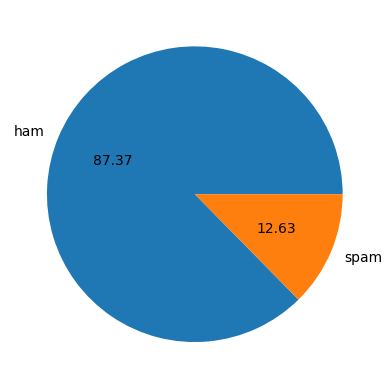

In [18]:
# to better representation we can use pychart 
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
# Data is imbalance as spam is less and ham is more

In [31]:
# to know how many alphabets used , sentences used

# to deeper analysics we add 3 columns 
# 1. number of character . 
# 2. number of words in the sms . 
# 3. number of sentences in the sms . 

import nltk 
# nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# featching the length of the every sms 
df['num_characters'] = df['text'].apply(len)

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
# featching number of words 
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
# featching number of sentence 
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# describing only ham  
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# describing only spam 
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
# we plot and see this difference of mean , max , ... of spam and ham clearly 
import seaborn as sns 

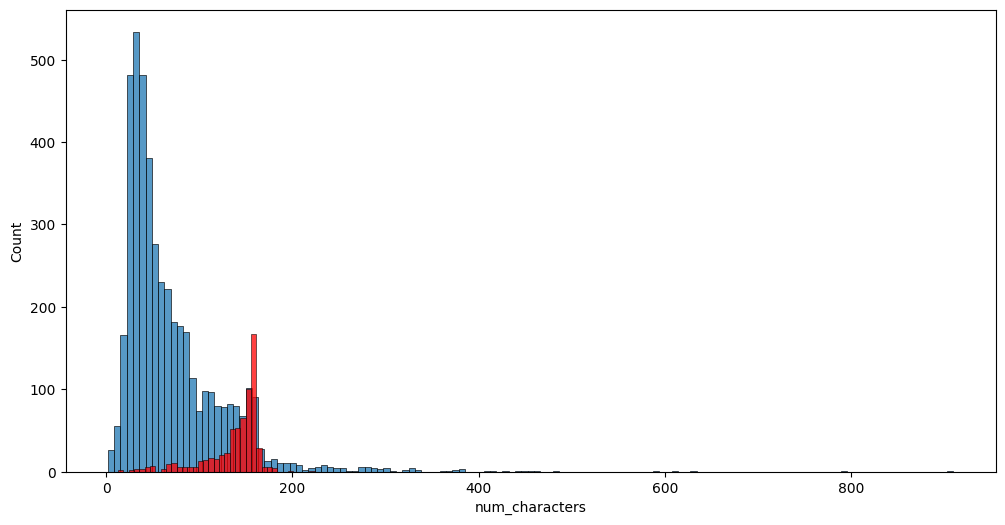

In [42]:
# number of character analysics on ham and then spam 
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()
# average number of characters used in spam is more than ham

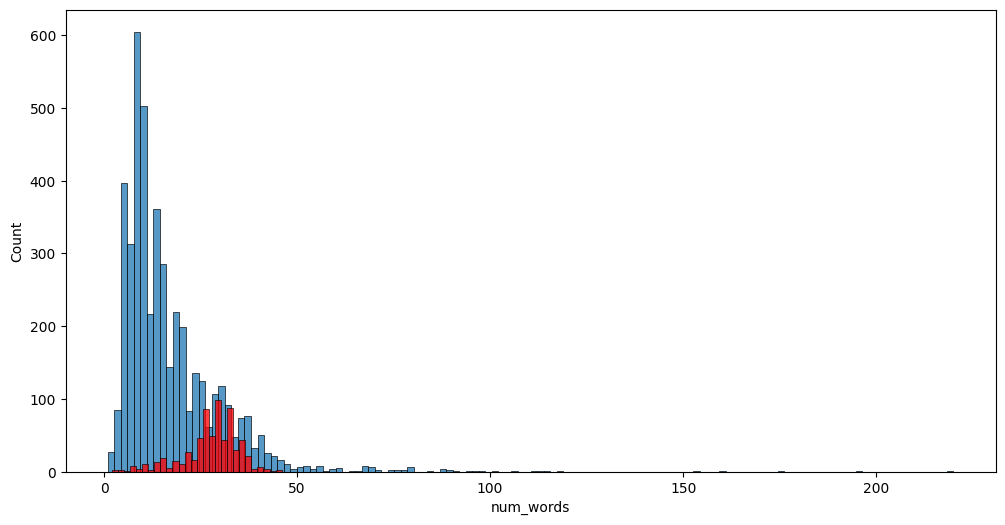

In [43]:
# number of words analysics on ham and then spam 
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

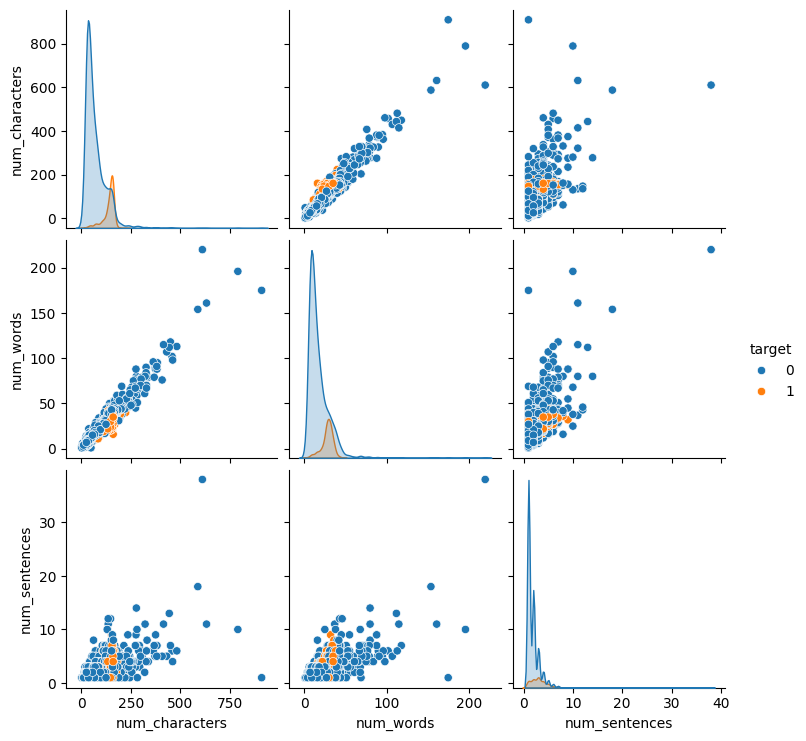

In [44]:
# finding the realtionship between number of words and number of relationship
sns.pairplot(df,hue='target')
plt.show()

<Axes: >

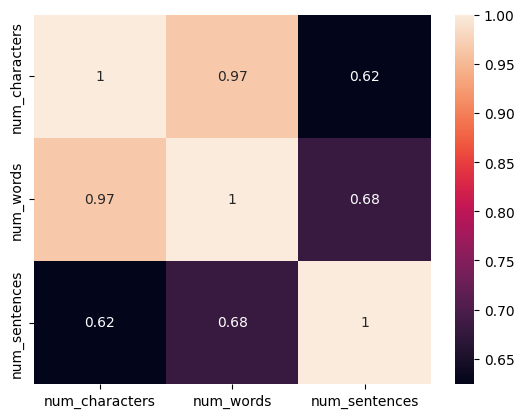

In [46]:
# we can find the correlation coefficient 
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True)
# we can see target have 0.38 correlationship with number of character
# so to build model we choose any one from this 3 : 0.38 , 0.64 , 0.68
# we generally choose o.38 i.e we keep num_character column

# <font color = 'orange'> 3. Data Preprocessing
***
### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuation
### Stemming - changing same meaning word or same word in different forms to one word

In [48]:
from nltk.corpus import stopwords

# Download stopwords data
nltk.download('stopwords')

# Get English stopwords
english_stopwords = stopwords.words('english')
print(english_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora\stopwords.zip.


In [49]:
from nltk.stem.porter import PorterStemmer
# brings to the basic form of the word
ps = PorterStemmer()
ps.stem("dancing")

'danc'

In [50]:
# we create a function that do all the work for us 
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) 
    
    y=[]
    for i in text : 
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text : 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text : 
        y.append(ps.stem(i))
    
    return " ".join(y)

In [51]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k?")

'gon na home soon want talk stuff anymor tonight k'

In [52]:
# now we will create column and add the transformed text into that new column
df['transformed_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
# Now we will create a word cloud for both spams and hams 
# word cloud show the important words bigger in that group of words 
from wordcloud import WordCloud
wc = WordCloud(width=500 , height = 500 , min_font_size=5 , background_color='White')

In [55]:
# creating a spam cloud 
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

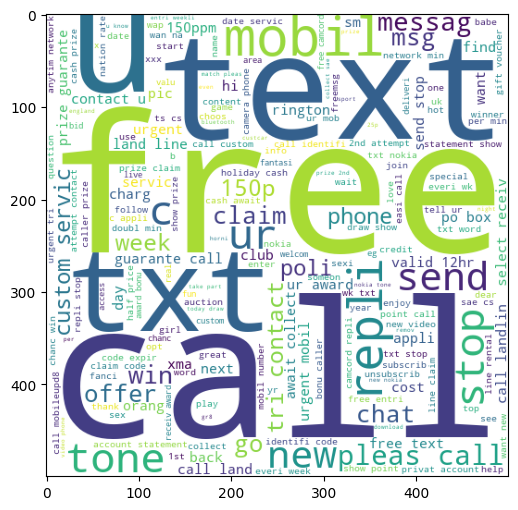

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [57]:
# creating a ham cloud 
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

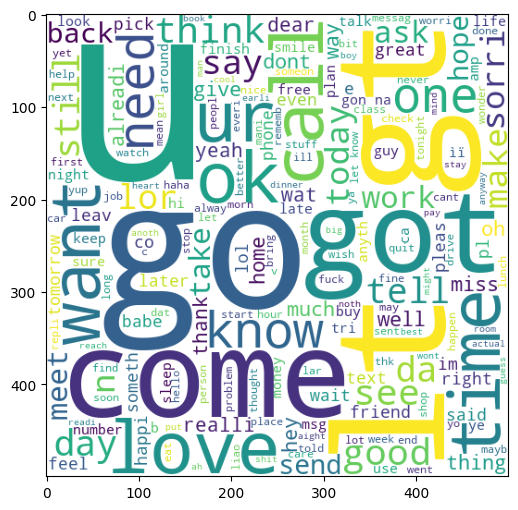

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
# getting top 30 spam words from the cloud 
# so we are taking the spam words from transformed text 
spam_corpus = []
for message in df[df['target']==1]['transformed_text'].tolist():
    for words in message.split():
        spam_corpus.append(words)

In [61]:
len(spam_corpus)

9939

In [64]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


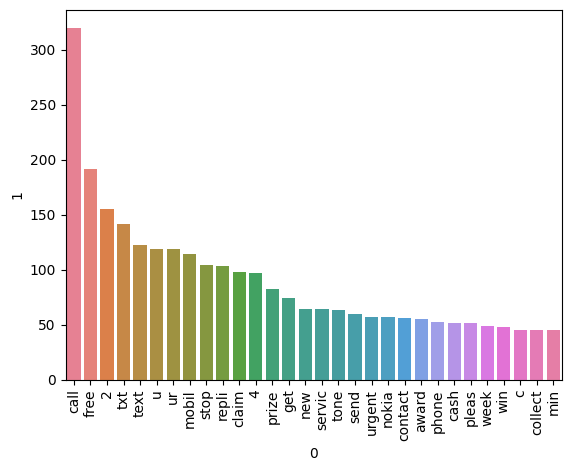

In [81]:
# to get the most common words we have to count them and choose 
# it is done we the below library
from collections import Counter
# sns.set_palette("pastel")
# palette = "Blues"
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],hue=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],legend=False)
plt.xticks(rotation='vertical')
plt.show()
# Here we the top 30 words which are used in spam 

In [82]:
# getting top 30 ham words from the cloud 
# so we are taking the spam words from transformed text 
ham_corpus = []
for message in df[df['target']==0]['transformed_text'].tolist():
    for words in message.split():
        ham_corpus.append(words)

In [83]:
len(ham_corpus)

35404

In [84]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


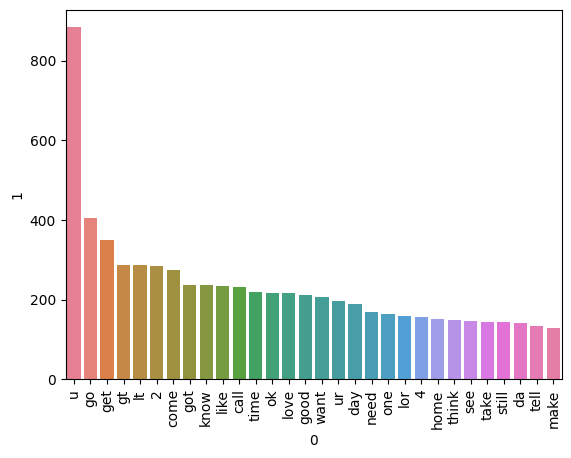

In [86]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],hue=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],legend=False)
plt.xticks(rotation='vertical')
plt.show()
# Here we the top 30 words which are used in spam 

# <font color = 'orange'> 4. Model Building 

In [87]:
# basically Naive Bayes works good for text data so we use it to build our model

# But when we see our data input i.e transformed text is in text format and our output i.e target is in numerical 
# so we now convert input in numerical by converting into vector or vectorization

# way of doing vectorization
# bag of words 
# tfidf
# word to it 

In [88]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
# to try now we will add tfidf vectorization
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [89]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [90]:
X.shape

(5169, 3000)

In [91]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

# we will avoid scaling as we have not seen the major improvement in the output

In [92]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [93]:
Y = df['target'].values

In [94]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# splitting the data into train and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state=2)

In [97]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
# calculating the efficency of the model by the below metrics 
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [98]:
# making object of all types of naive bayes 
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [99]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [100]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [101]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))
# here we have good accuracy score and good precision score

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [102]:
# after using tfidf vectorizer we came to know that precision score is high in multi nomial naive bayes 
# as data is imbalanced we have to check the precision score so we choose  multi nomial naive bayes 
# tfidf => mnb

In [103]:
# we will text on model on different classification algorithm   
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [109]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2,algorithm='SAMME')
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [110]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [111]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [112]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [113]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [114]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [115]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [116]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [117]:
performance_df1 

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


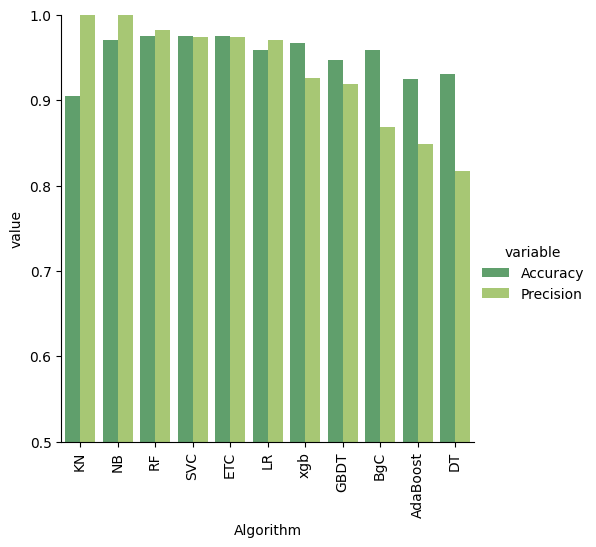

In [120]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5,palette='summer')
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [121]:
# model improve
# 1. change the max_features parameter of TfIdf

In [122]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [123]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [124]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [125]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [126]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [127]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


In [128]:
# Voting Classifier
# we do this upon the best performing algorithm to improve 
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [129]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [130]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [131]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [132]:
# Applying stacking
# it is similar to voting 
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [133]:
from sklearn.ensemble import StackingClassifier

In [134]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [135]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [136]:
# Now , we will use multi nomial naive bayes 
# so we create a pipeline to website

In [137]:
# So , Now if any new sms text comes then we have to process and send output 
# Steps :
# 1. Text transform .
# 2. Vectorization.
# 3. Applying Algorithm .

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))